In [35]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [37]:
x

array([0.10690789, 1.        , 0.40977444, 0.00142857, 0.5       ,
       0.69230769, 0.375     , 0.00140351, 0.        , 1.        ,
       0.01492537, 0.        , 0.        , 0.28      , 0.        ])

In [38]:
y

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [39]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [40]:
sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [41]:
x

array([0.10690789, 1.        , 0.40977444, 0.00142857, 0.5       ,
       0.69230769, 0.375     , 0.00140351, 0.        , 1.        ,
       0.01492537, 0.        , 0.        , 0.28      , 0.        ])

In [42]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [43]:
som

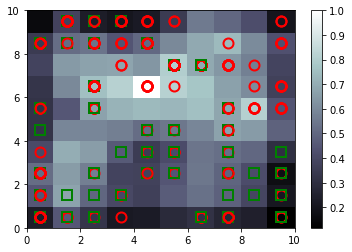

In [44]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
#pcolor(som.distance_map())
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [45]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(7,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
# change the float format to %.3f

In [46]:
mappings

defaultdict(list,
            {(4,
              8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
                     0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.30921519, 1.        , 0.44240602, 0.17857143, 0.5       ,
                     0.15384615, 0.5       , 0.07894737, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.0705    , 0.        ]), array([0.57477506, 1.        , 0.14030075, 0.08928571, 0.5       ,
                     0.        , 0.        , 0.00298246, 0.        , 0.        ,
                     0.        , 1.        , 0.5       , 0.05      , 0.04208   ]), array([5.45275078e-01, 1.00000000e+00, 5.26315789e-02, 1.07142857e-01,
                     5.00000000e-01, 2.30769231e-01, 3.75000000e-01, 1.40350877e-03,
                     0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
            

In [47]:
frauds

array([[1.5571121e+07, 0.0000000e+00, 1.5830000e+01, 5.8500000e-01,
        2.0000000e+00, 8.0000000e+00, 8.0000000e+00, 1.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.0000000e+00],
       [1.5660390e+07, 0.0000000e+00, 5.8670000e+01, 4.4600000e+00,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 3.0400000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 4.3000000e+01, 5.6100000e+02],
       [1.5577515e+07, 0.0000000e+00, 6.8670000e+01, 1.5000000e+01,
        2.0000000e+00, 1.0000000e+01, 9.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.4000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.3770000e+03],
       [1.5598802e+07, 0.0000000e+00, 4.7420000e+01, 8.0000000e+00,
        2.0000000e+00, 1.0000000e+01, 5.0000000e+00, 6.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 0.0000000e+00,
        2.0000000e+00,